# Movie Recommendation System using User Ratings Data
## -kNN, Cosine Similarity
* Recommender systems are used in a variety of areas, with commonly recognised examples taking the form of playlist generators for video and music services, product recommenders for online stores, or content recommenders for social media platforms. In this project, I am creating a movie recmmender.
* The idea behind Content-based (cognitive filtering) recommendation system is to recommend an item based on a comparison between the content of the items and a user profile.

[LinkedIn/preetshah](https://www.linkedin.com/in/preet-shah-53527b185/),[GitHuB/preetshah7](https://github.com/preetshah7)

### Collaborative & Content Based Filtering

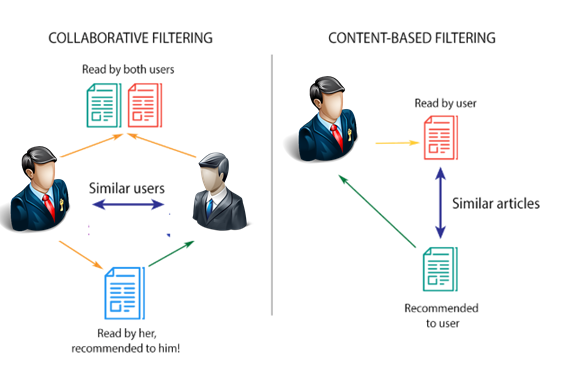

*Source of image: https://www.artificialintelligence21.tech/*

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np

### Importing Datasets
Below data has been taken from MovieLens 20M Dataset
*Source: https://www.kaggle.com/grouplens/movielens-20m-dataset?select=movie.csv*

Context - The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies.

In [4]:
# usecols allows us to select our choice of features
movies_df=pd.read_csv('movies.csv', usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
movies_df.tail()

,movieId,title
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)
9741,193609,Andrew Dice Clay: Dice Rules (1991)


In [5]:
ratings_df=pd.read_csv('ratings.csv',
    usecols=['userId', 'movieId', 'rating','timestamp'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
ratings_df.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [6]:
#checkinng for NaN values
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [7]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (9742, 2)
Ratings: (100836, 4)


### Merging the imported Datasets for Analysis

In [10]:
#movies_df.info()
#ratings_df.info()
movies_merged_df=movies_df.merge(ratings_df, on='movieId')
movies_merged_df.tail()

,movieId,title,userId,rating,timestamp
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),184,3.5,1537109545
100833,193585,Flint (2017),184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,1537110021
100835,193609,Andrew Dice Clay: Dice Rules (1991),331,4.0,1537157606


In [11]:
movies_merged_df=movies_merged_df.dropna(axis = 0, subset = ['title'])
movies_merged_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.0,964982703
1,1,Toy Story (1995),5,4.0,847434962
2,1,Toy Story (1995),7,4.5,1106635946
3,1,Toy Story (1995),15,2.5,1510577970
4,1,Toy Story (1995),17,4.5,1305696483


In [12]:
movies_average_rating=movies_merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,Gena the Crocodile (1969),5.0
1,True Stories (1986),5.0
2,Cosmic Scrat-tastrophe (2015),5.0
3,Love and Pigeons (1985),5.0
4,Red Sorghum (Hong gao liang) (1987),5.0


In [15]:
movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,'71 (2014),1,4.0
1,Latter Days (2003),1,3.5
2,"Late Shift, The (1996)",1,2.5
3,Late Night with Conan O'Brien: The Best of Tri...,1,2.0
4,Late Night Shopping (2001),1,4.5


**Observation**- 
* Many movies have a pefrect 5 star average rating on a dataset of almost 100k user ratings. This suggests the existence of outliers which we need to further confirm with visualization.
* The presence of single ratings for several movies suggests that I set a threshold value of ratings to produce valuable recommendations

### Data Visualization
I will focus on creating plots to prove/disprove the observations and analyze the trends in the data (if any). I will stick to seaborn and matplotlib for this project.

In [16]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline

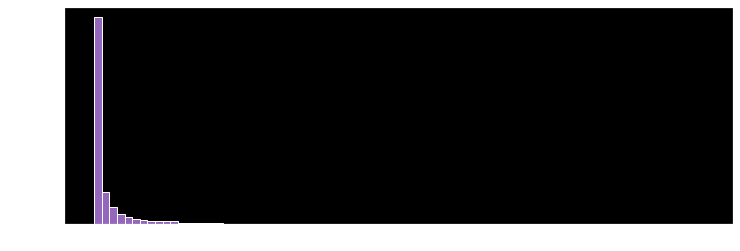

In [17]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('ratingcounthist.jpg')

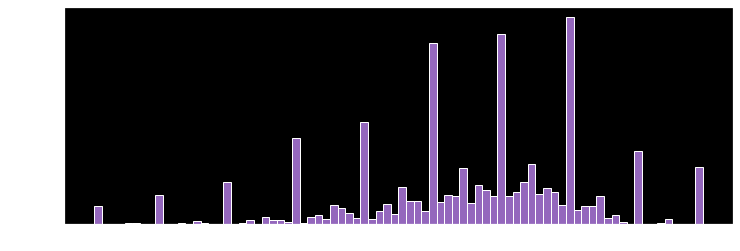

In [18]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')

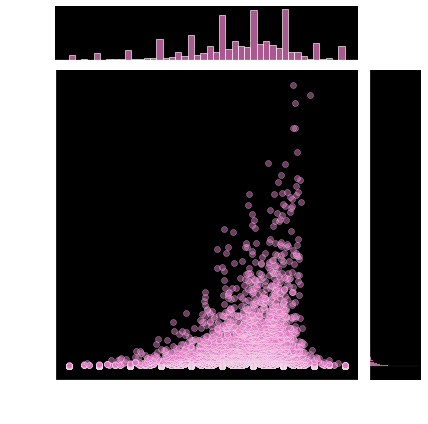

In [19]:

plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plot.savefig('joinplot.jpg')

**Analysis**-
* Plot #1 confirms our observations of a high volume of movies with low ratings count. Apart from setting a threshold, we can also use quantiles at some higher percentile for this usecase.
* Histogram #2 showcases the distribution function of the Average Rating values.
* Joinplot beautifully illustrates that there is only a subset of values with higher rating that have considerable amount of ratings.

### Eliminating Outliers

In [20]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),1,4.0,964982703,215
1,1,Toy Story (1995),5,4.0,847434962,215
2,1,Toy Story (1995),7,4.5,1106635946,215
3,1,Toy Story (1995),15,2.5,1510577970,215
4,1,Toy Story (1995),17,4.5,1305696483,215


In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   100836.000
mean        58.759
std         61.965
min          1.000
25%         13.000
50%         39.000
75%         84.000
max        329.000
Name: Rating Count, dtype: float64


In [22]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()
#popular_movies.shape

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),1,4.000,964982703,215
1,1,Toy Story (1995),5,4.000,847434962,215
2,1,Toy Story (1995),7,4.500,1106635946,215
3,1,Toy Story (1995),15,2.500,1510577970,215
4,1,Toy Story (1995),17,4.500,1305696483,215


### Pivotting title as indices & userId as columns

In [24]:
import os
movie_features_df=popular_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()
movie_features_df.to_excel('output.xlsx')

### Creating kNN Model

In [25]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [26]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [27]:
movie_features_df.shape

(450, 606)

In [28]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

78


In [29]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [34]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Cable Guy, The (1996):

1: Happy Gilmore (1996), with distance of 0.5489250421524048:
2: Mars Attacks! (1996), with distance of 0.5512819886207581:
3: Nutty Professor, The (1996), with distance of 0.5769508481025696:
4: Ace Ventura: When Nature Calls (1995), with distance of 0.5820552706718445:
5: Independence Day (a.k.a. ID4) (1996), with distance of 0.5879595279693604:


**Future Scope**-
*Feel free to reach out to discuss further about the project*
* This dataset isn't considerably large, but this algorithm should perform similarly if it were.
* The presence of timestamp in the 'ratings.csv' can help us analyze how ratings change over a period of time and ratings can be weighed according to their timestamp while parsing to our models
* This model performs far better than a weighted average or a correlation model, but there is scope to implement advanced ML algorithms & even DL models

[LinkedIn/preetshah](https://www.linkedin.com/in/preet-shah-53527b185/),[GitHuB/preetshah7](https://github.com/preetshah7)